<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/Linear_Reg_cleaning_adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv('Cars_price.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

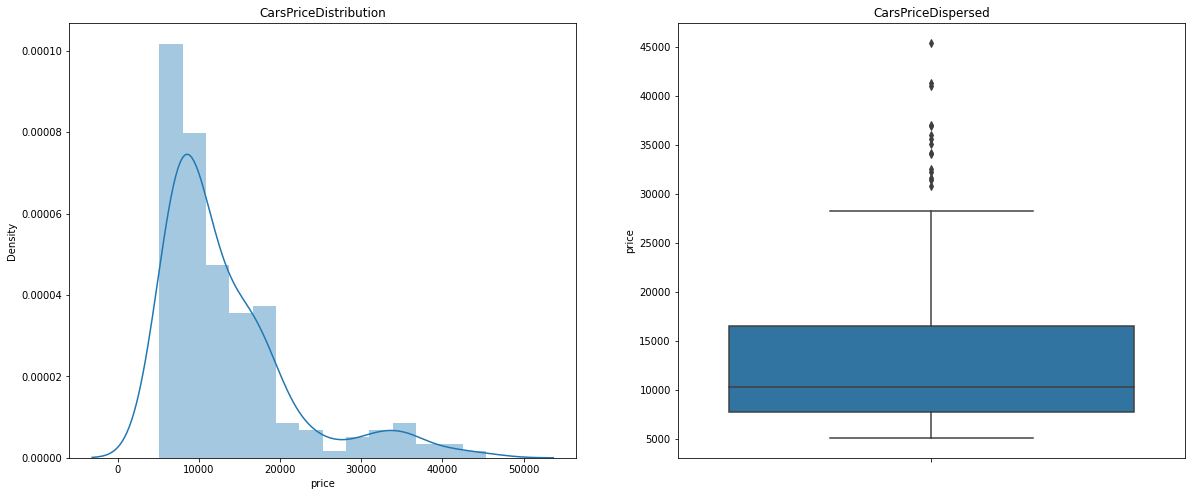

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('CarsPriceDistribution')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('CarsPriceDispersed')
sns.boxplot(y=cars.price)
plt.show()

In [ ]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Step 3.1 : Visualising Categorical Data
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel


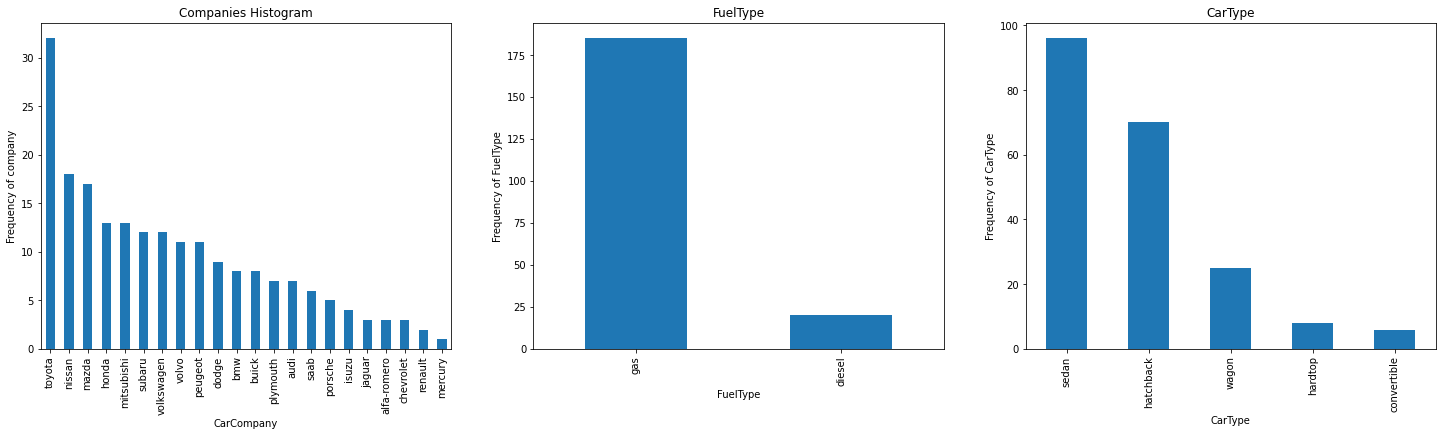

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plot1=cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plot1.set(xlabel='CarCompany',ylabel='Frequency of company')

plt.subplot(1,3,2)
plot1=cars.fueltype.value_counts().plot(kind='bar')
plt.title('FuelType')
plot1.set(xlabel='FuelType',ylabel='Frequency of FuelType')

plt.subplot(1,3,3)
plot1=cars.carbody.value_counts().plot(kind='bar')
plt.title('CarType')
plot1.set(xlabel='CarType',ylabel='Frequency of CarType')
plt.show()

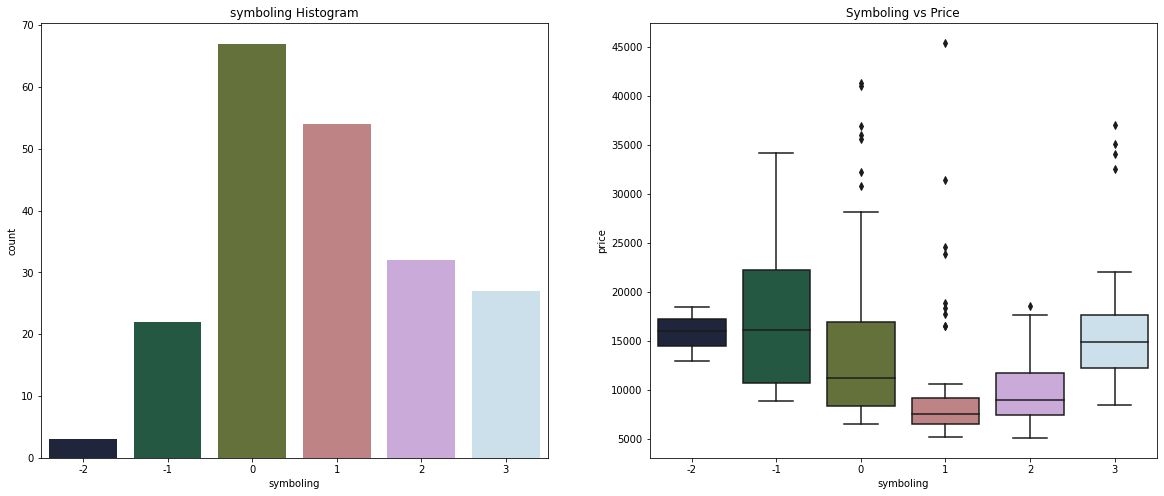

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('symboling Histogram')
sns.countplot(cars.symboling,palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling,y=cars.price,palette=('cubehelix'))
plt.show()

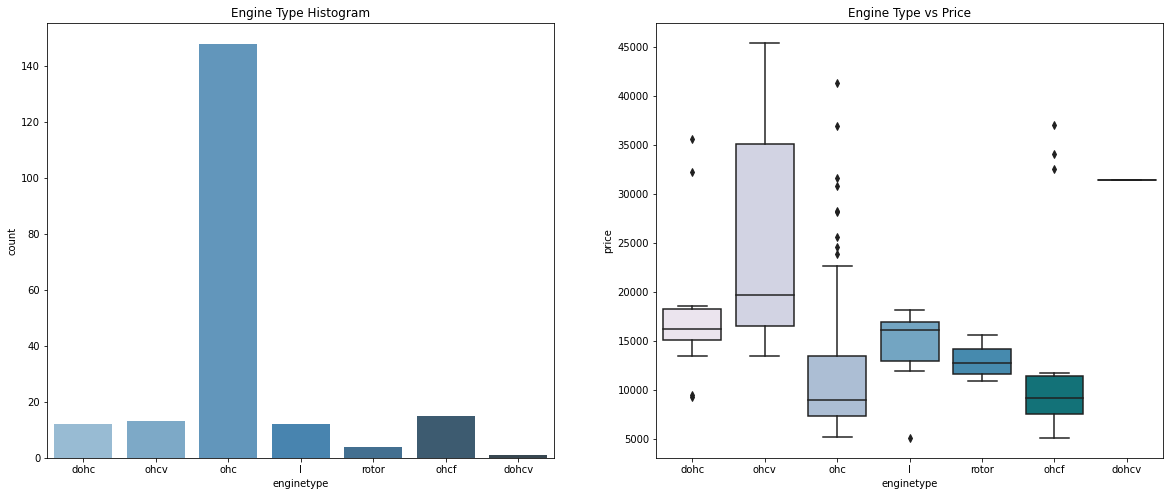

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

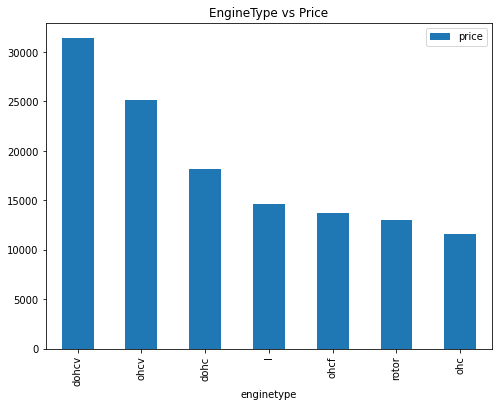

In [ ]:
df=pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(8,6))
plt.title('EngineType vs Price')
plt.show()

<Figure size 1800x576 with 0 Axes>

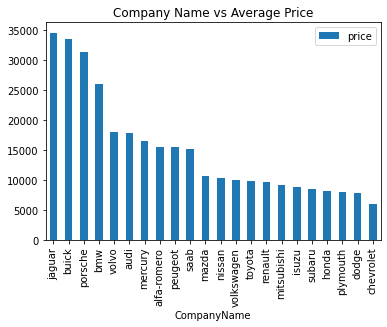

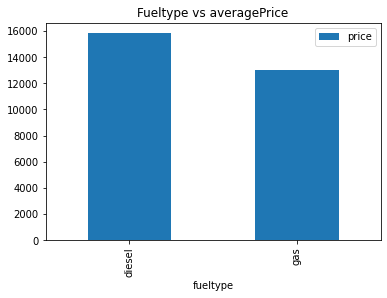

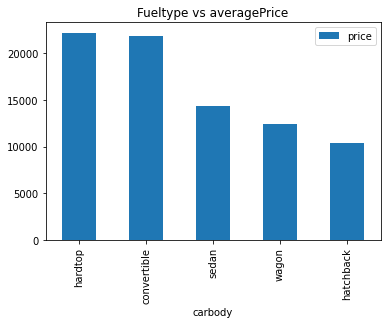

In [ ]:
plt.figure(figsize=(25,8))
df=pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df=pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('FuelType vs AveragePrice')
plt.title('Fueltype vs averagePrice')
plt.show()

df=pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('FuelType vs AveragePrice')
plt.title('Fueltype vs averagePrice')
plt.show()


In [ ]:
pd.DataFrame(cars.groupby(['CompanyName'])['price'])

,0,1
0,alfa-romero,0 13495.0 1 16500.0 2 16500.0 Name: p...
1,audi,3 13950.000 4 17450.000 5 15250.000 6...
2,bmw,10 16430.0 11 16925.0 12 20970.0 13 ...
3,buick,67 25552.0 68 28248.0 69 28176.0 70 ...
4,chevrolet,18 5151.0 19 6295.0 20 6575.0 Name: p...
5,dodge,21 5572.0 22 6377.0 23 7957.0 24 ...
6,honda,30 6479.0 31 6855.0 32 5399.0 33 ...
7,isuzu,43 6785.0 44 8916.5 45 8916.5 46 ...
8,jaguar,47 32250.0 48 35550.0 49 36000.0 Name...
9,mazda,50 5195.0 51 6095.0 52 6795.0 53 ...


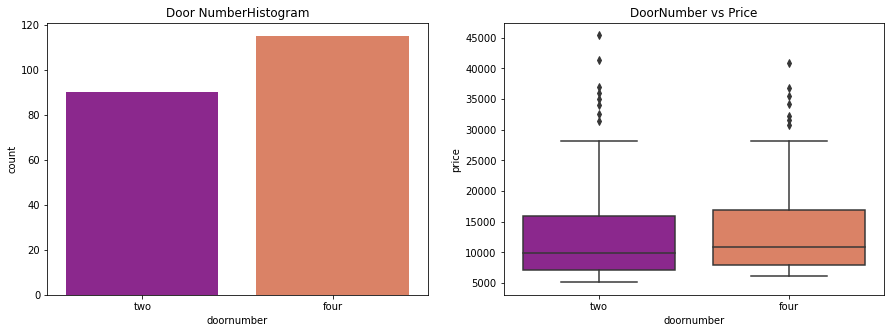

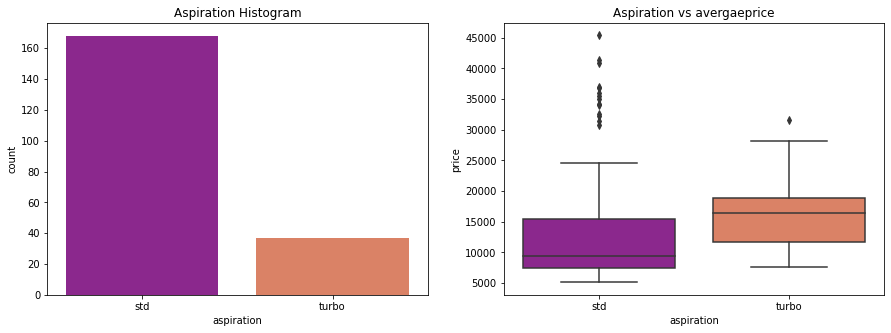

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Door NumberHistogram')
sns.countplot(cars.doornumber,palette=('plasma'))

plt.subplot(1,2,2)
plt.title('DoorNumber vs Price')
sns.boxplot(x=cars.doornumber,y=cars.price,palette=('plasma'))
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration,palette=('plasma'))

plt.subplot(1,2,2)
plt.title('Aspiration vs avergaeprice')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=('plasma'))
plt.show()

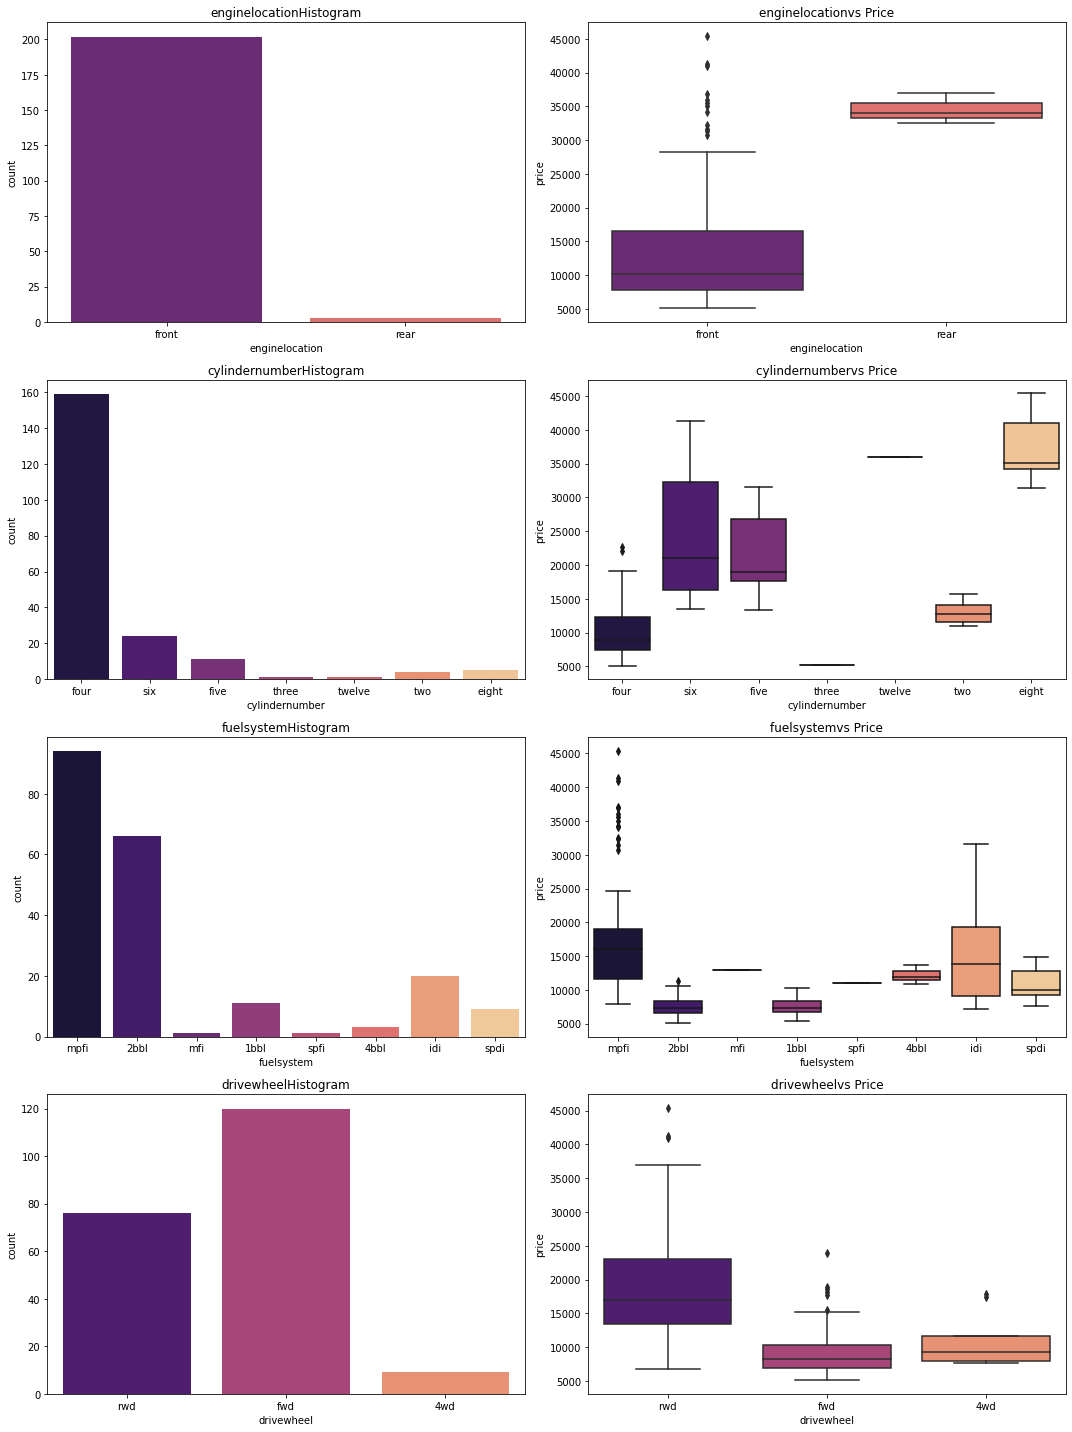

In [ ]:
def cont_plot(x,fig):
  plt.subplot(4,2,fig)
  plt.title(x+'Histogram')
  sns.countplot(cars[x],palette=('magma'))
  
  plt.subplot(4,2,(fig+1))
  plt.title(x+'vs Price')
  sns.boxplot(x=cars[x],y=cars.price,palette=('magma'))

plt.figure(figsize=(15,20))
cont_plot('enginelocation', 1)
cont_plot('cylindernumber', 3)
cont_plot('fuelsystem', 5)
cont_plot('drivewheel', 7)

plt.tight_layout()


Inference :
Very few datapoints for enginelocation categories to make an inference.

Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference

A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel

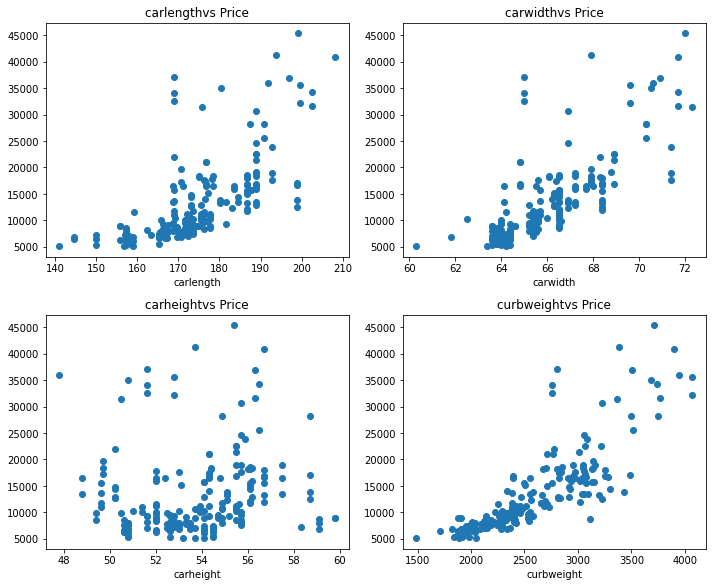

In [31]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars.price)
    plt.title(x+'vs Price')
    plt.xlabel(x)
plt.figure(figsize=(10,20))
scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

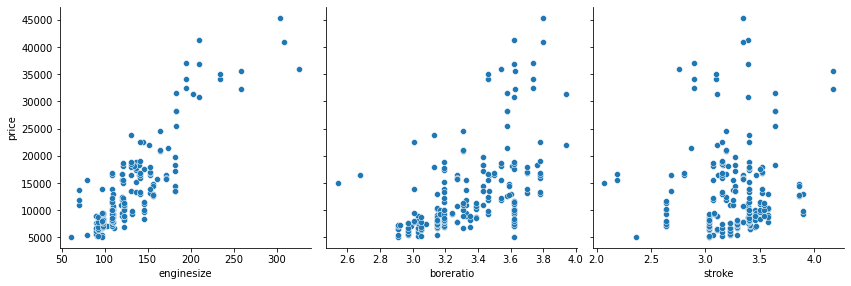

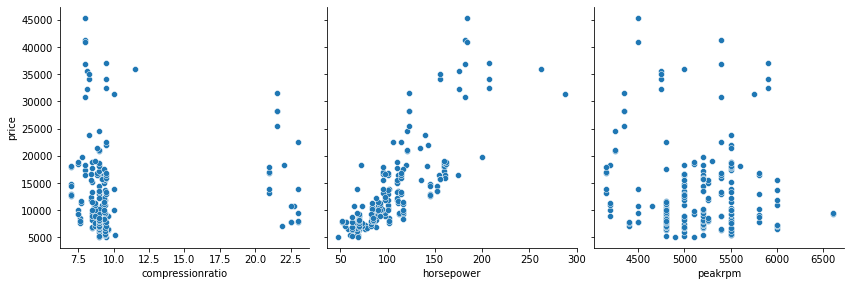

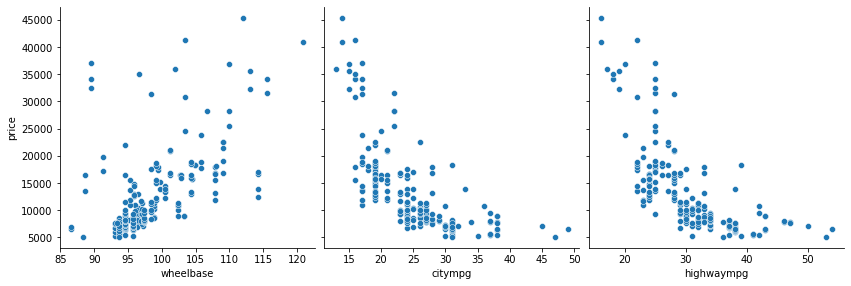

In [33]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

Inference :

enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

citympg, highwaympg - seem to have a significant negative correlation with price.

In [34]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

In [38]:
#DEVRIVING NEW fEATURE
#Creating New column because of multicollineraity
cars['fueleconomy']=(cars['citympg']*5)+(cars['highwaympg']*0.45)

In [43]:
#Binning the Car Companies based on avg prices of each Company.
cars['price']=cars['price'].astype('int')
temp=cars.copy()
table=temp.groupby(['CompanyName'])['price'].mean()

In [45]:
temp=temp.merge(table.reset_index(),how='left',on='CompanyName')
bins=[0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,117.15,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,117.15,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,106.70,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,133.50,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,99.90,Medium


In [42]:
temp.merge(table.reset_index(), how='left',on='CompanyName')

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,fueleconomy,price_y
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,117.15,15498.333333
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,117.15,15498.333333
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,106.70,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,133.50,17859.142857
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,99.90,17859.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,127.60,18063.181818
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,106.25,18063.181818
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,100.35,18063.181818
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,142.15,18063.181818


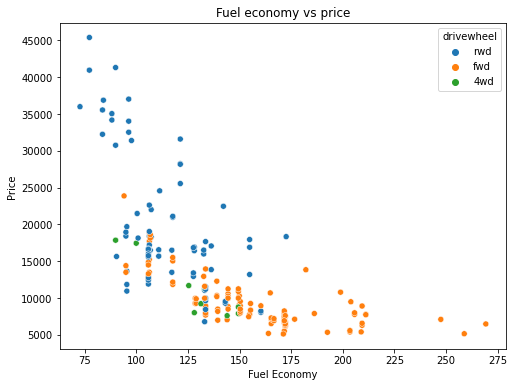

<Figure size 432x288 with 0 Axes>

In [49]:
#BIVARIATE ANALYSIS
plt.figure(figsize=(8,6))
plt.title('Fuel economy vs price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()
plt.tight_layout()

Inference :

fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 1800x432 with 0 Axes>

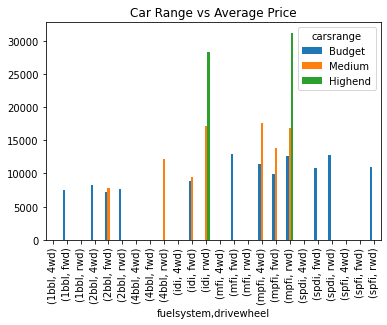

In [51]:
plt.figure(figsize=(25,6))
df=pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()


fueltype                    diesel           gas
carsrange drivewheel                            
Budget    4wd                  NaN   9211.142857
          fwd          8794.666667   8173.191176
          rwd                  NaN  11659.941176
Medium    4wd                  NaN  17654.500000
          fwd          9500.666667  10919.790698
          rwd         17114.142857  16295.535714
Highend   4wd                  NaN           NaN
          fwd                  NaN           NaN
          rwd         28394.000000  31267.600000

Inference :

High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

List of significant variables after Visual analysis :¶
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 